In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
import os
os.chdir("/content/drive/My Drive/homework4")
!ls

chest_xray  homework4.ipynb  homework_home.ipynb  inceptionweights


In [4]:
import pandas as pd
import numpy as np
import os
import keras
import matplotlib.pyplot as plt
from keras.layers import Dense,GlobalAveragePooling2D
from keras.applications.inception_v3 import InceptionV3
from keras.preprocessing import image
from keras.applications.mobilenet import preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.optimizers import Adam

Using TensorFlow backend.


In [5]:
base_model = InceptionV3(weights='imagenet', include_top=False)
x=base_model.output
x=GlobalAveragePooling2D()(x)
x=Dense(1024,activation='relu')(x) #we add dense layers so that the model can learn more complex functions and classify for better results.
x=Dense(1024,activation='relu')(x) #dense layer 2
x=Dense(512,activation='relu')(x) #dense layer 3
preds=Dense(2,activation='softmax')(x) #final layer with softmax activation









87916544/87910968 [==============================] - 1s 0us/step


In [0]:
model=Model(inputs=base_model.input,outputs=preds)

In [7]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)


train_datagen=ImageDataGenerator(preprocessing_function=preprocess_input) #included in our dependencies

train_generator=train_datagen.flow_from_directory('chest_xray/train', # this is where you specify the path to the main data folder
                                                 target_size=(224,224),
                                                 color_mode='rgb',
                                                 batch_size=32,
                                                 class_mode='categorical',
                                                 shuffle=True)

test_generator=test_datagen.flow_from_directory('chest_xray/test', # this is where you specify the path to the main data folder
                                                 target_size=(224,224),
                                                 color_mode='rgb',
                                                 batch_size=32,
                                                 class_mode='categorical',
                                                 shuffle=True)

Found 1022 images belonging to 2 classes.
Found 274 images belonging to 2 classes.


In [8]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
# Adam optimizer
# loss function will be categorical cross entropy
# evaluation metric will be accuracy

step_size_train=train_generator.n//train_generator.batch_size
history=model.fit_generator(generator=train_generator,
                   steps_per_epoch=step_size_train,
                   epochs=5,
                   validation_data = test_generator,
                   validation_steps = None)


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/5
31/31 [==============================] - 645s 21s/step - loss: 0.3423 - acc: 0.9002 - val_loss: 0.6928 - val_acc: 0.7993
Epoch 2/5
31/31 [==============================] - 612s 20s/step - loss: 0.1391 - acc: 0.9486 - val_loss: 1.6111 - val_acc: 0.7518
Epoch 3/5
31/31 [==============================] - 615s 20s/step - loss: 0.1307 - acc: 0.9616 - val_loss: 0.5967 - val_acc: 0.8394
Epoch 4/5
31/31 [==============================] - 613s 20s/step - loss: 0.0829 - acc: 0.9869 - val_loss: 2.5709 - val_acc: 0.6898
Epoch 5/5
31/31 [==============================] - 611s 20s/step - loss: 0.0809 - acc: 0.9687 - val_loss: 4.1691 - val_acc: 0.6934


/usr/local/lib/python3.6/dist-packages/matplotlib/legend.py:497: UserWarning: Unrecognized location "left". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


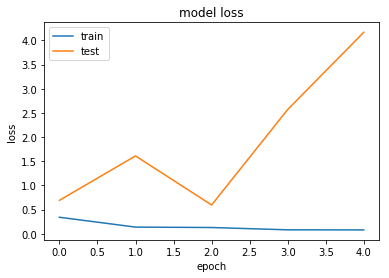

In [10]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='left')
plt.show()

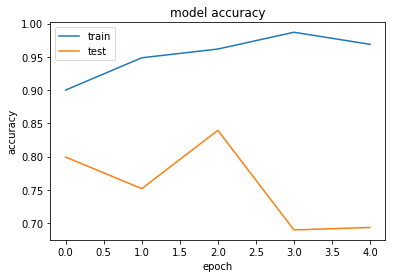

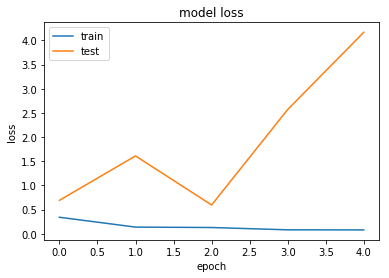

In [11]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Example 2 with Dropout + Batch Normalization

In [0]:
import pandas as pd
import numpy as np
import os
import keras
import matplotlib.pyplot as plt
from keras.layers import Dense,GlobalAveragePooling2D
from keras.applications.inception_v3 import InceptionV3
from keras.preprocessing import image
from keras.applications.mobilenet import preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.optimizers import Adam
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, Convolution2D
from keras.layers import Dropout
from keras.layers.normalization import BatchNormalization
from keras import optimizers

In [13]:
base_model = InceptionV3(weights='imagenet', include_top=False)
x=base_model.output
x=GlobalAveragePooling2D()(x)
x=BatchNormalization()(x)
x=Dense(1024,activation='relu')(x) #we add dense layers so that the model can learn more complex functions and classify for better results.
x=Dense(1024,activation='relu')(x) #dense layer 2
x=Dropout(0.5)(x)
x=Dense(512,activation='relu')(x) #dense layer 3
preds=Dense(2,activation='softmax')(x) #final layer with softmax activation

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
model=Model(inputs=base_model.input,outputs=preds)

In [15]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)


train_datagen=ImageDataGenerator(preprocessing_function=preprocess_input) #included in our dependencies

train_generator=train_datagen.flow_from_directory('chest_xray/train', # this is where you specify the path to the main data folder
                                                 target_size=(224,224),
                                                 color_mode='rgb',
                                                 batch_size=32,
                                                 class_mode='categorical',
                                                 shuffle=True)

test_generator=test_datagen.flow_from_directory('chest_xray/test', # this is where you specify the path to the main data folder
                                                 target_size=(224,224),
                                                 color_mode='rgb',
                                                 batch_size=32,
                                                 class_mode='categorical',
                                                 shuffle=True)

Found 1066 images belonging to 2 classes.
Found 274 images belonging to 2 classes.


In [16]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
# Adam optimizer
# loss function will be categorical cross entropy
# evaluation metric will be accuracy

step_size_train=train_generator.n//train_generator.batch_size
history=model.fit_generator(generator=train_generator,
                   steps_per_epoch=step_size_train,
                   epochs=5,
                   validation_data = test_generator,
                   validation_steps = None)

Epoch 1/5
33/33 [==============================] - 656s 20s/step - loss: 0.6456 - acc: 0.8502 - val_loss: 8.6264 - val_acc: 0.4416
Epoch 2/5
33/33 [==============================] - 634s 19s/step - loss: 0.2040 - acc: 0.9438 - val_loss: 0.7277 - val_acc: 0.8285
Epoch 3/5
33/33 [==============================] - 632s 19s/step - loss: 0.1180 - acc: 0.9706 - val_loss: 0.8741 - val_acc: 0.7774
Epoch 4/5
33/33 [==============================] - 632s 19s/step - loss: 0.1440 - acc: 0.9740 - val_loss: 0.5111 - val_acc: 0.8212
Epoch 5/5
33/33 [==============================] - 632s 19s/step - loss: 0.1582 - acc: 0.9429 - val_loss: 4.0528 - val_acc: 0.7372


/usr/local/lib/python3.6/dist-packages/matplotlib/legend.py:497: UserWarning: Unrecognized location "left". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


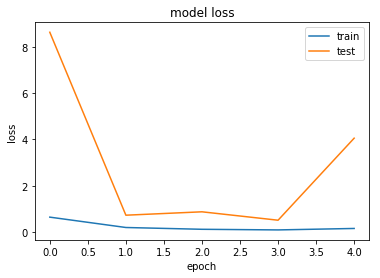

In [17]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='left')
plt.show()

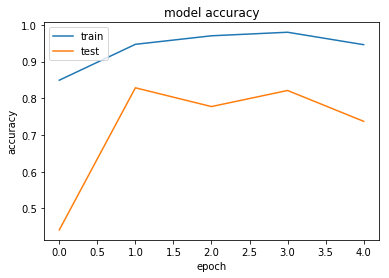

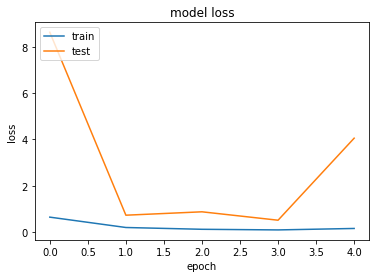

In [18]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()